## Some simple first predictions

In [1]:
# loading libraries

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from math import nan

pd.set_option('display.max_columns', None)

In [2]:
# loading destatis data
path = '../data/processed/combined_data.csv'
df = pd.read_csv(path)
index_list = pd.read_csv('../data/processed/index_list_combined_data.csv', names=['Datum'])
index_list.drop(index_list.index[0], inplace=True)
df.index = index_list['Datum']
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

# dropping first column which is just the date
#df = df.iloc[:, 1:]
                # for usage of column numbers in baseline model this is needed

df

,date,Betriebe_WZ08-10,Betriebe_ep_WZ08-10,Beschäftigte_WZ08-10,Beschäftigte_ep_WZ08-10,Geleistete Arbeitsstunden_WZ08-10,Geleistete Arbeitsstunden_ep_WZ08-10,Bruttolohn- und -gehaltssumme_WZ08-10,Bruttolohn- und -gehaltssumme_ep_WZ08-10,Umsatz_WZ08-10,Umsatz_ep_WZ08-10,Inlandsumsatz_WZ08-10,Inlandsumsatz_ep_WZ08-10,Auslandsumsatz_WZ08-10,Auslandsumsatz_ep_WZ08-10,Auslandsumsatz mit der Eurozone_WZ08-10,Auslandsumsatz mit der Eurozone_ep_WZ08-10,Auslandsumsatz mit dem sonstigen Ausland_WZ08-10,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-10,Betriebe_WZ08-108,Betriebe_ep_WZ08-108,Beschäftigte_WZ08-108,Beschäftigte_ep_WZ08-108,Geleistete Arbeitsstunden_WZ08-108,Geleistete Arbeitsstunden_ep_WZ08-108,Bruttolohn- und -gehaltssumme_WZ08-108,Bruttolohn- und -gehaltssumme_ep_WZ08-108,Umsatz_WZ08-108,Umsatz_ep_WZ08-108,Inlandsumsatz_WZ08-108,Inlandsumsatz_ep_WZ08-108,Auslandsumsatz_WZ08-108,Auslandsumsatz_ep_WZ08-108,Auslandsumsatz mit der Eurozone_WZ08-108,Auslandsumsatz mit der Eurozone_ep_WZ08-108,Auslandsumsatz mit dem sonstigen Ausland_WZ08-108,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-108,Betriebe_WZ08-1082,Betriebe_ep_WZ08-1082,Beschäftigte_WZ08-1082,Beschäftigte_ep_WZ08-1082,Geleistete Arbeitsstunden_WZ08-1082,Geleistete Arbeitsstunden_ep_WZ08-1082,Bruttolohn- und -gehaltssumme_WZ08-1082,Bruttolohn- und -gehaltssumme_ep_WZ08-1082,Umsatz_WZ08-1082,Umsatz_ep_WZ08-1082,Inlandsumsatz_WZ08-1082,Inlandsumsatz_ep_WZ08-1082,Auslandsumsatz_WZ08-1082,Auslandsumsatz_ep_WZ08-1082,Auslandsumsatz mit der Eurozone_WZ08-1082,Auslandsumsatz mit der Eurozone_ep_WZ08-1082,Auslandsumsatz mit dem sonstigen Ausland_WZ08-1082,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-1082,Betriebe_WZ08-1083,Betriebe_ep_WZ08-1083,Beschäftigte_WZ08-1083,Beschäftigte_ep_WZ08-1083,Geleistete Arbeitsstunden_WZ08-1083,Geleistete Arbeitsstunden_ep_WZ08-1083,Bruttolohn- und -gehaltssumme_WZ08-1083,Bruttolohn- und -gehaltssumme_ep_WZ08-1083,Umsatz_WZ08-1083,Umsatz_ep_WZ08-1083,Inlandsumsatz_WZ08-1083,Inlandsumsatz_ep_WZ08-1083,Auslandsumsatz_WZ08-1083,Auslandsumsatz_ep_WZ08-1083,Auslandsumsatz mit der Eurozone_WZ08-1083,Auslandsumsatz mit der Eurozone_ep_WZ08-1083,Auslandsumsatz mit dem sonstigen Ausland_WZ08-1083,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-1083,ErzPr_Nahrungsmittel und Futtermittel,ErzPr_ Sonstige Nahrungsmittel (ohne Getränke),ErzPr_ Süßwaren (ohne Dauerbackwaren),ErzPr_ Schokoladen und andere Süßwaren,"ErzPr_ Schokolade u.a. kakaoh. Lebensm.zub.,in Verp.>2kg","ErzPr_ Schokolade u.a. kakaoh. Leb.m.zuber.,in Verp.<=2kg",ErzPr_ Süßwaren oh. Kakaogeh. (einschl.weißer Schokolade),"ErzPr_ Kaffee und Tee, Kaffee-Ersatz","ErzPr_ Kaffee und Tee, Kaffee-Ersatz","ErzPr_ Kaffee, entkoffeiniert oder geröstet","ErzPr_ Kaffeemittel m. -geh.,Auszüge,Essenz.,Konzentrate","ErzPr_ Grüner Tee (n. ferment.), schwarzer Tee (ferment.)",ErzPr_ Kräutertees,EinfPr_Nahrungsmittel und Futtermittel,EinfPr_ Sonstige Nahrungsmittel (ohne Getränke),EinfPr_ Süßwaren (ohne Dauerbackwaren),"EinfPr_ Kaffee und Tee, Kaffee-Ersatz",VPI_Nahrungsmittel und alkoholfreie Getränke,VPI_ Nahrungsmittel,"VPI_ Zucker, Marmelade, Honig und andere Süßwaren",VPI_ Schokoladen,VPI_ Süßwaren,VPI_ Alkoholfreie Getränke,"VPI_ Kaffee, Tee und Kakao",VPI_ Kaffee und Ähnliches,VPI_ Tee und teeähnliche Erzeugnisse,VPI_ Kakaopulver oder Ähnliches,"Wert der zum Absatz bestimmten Produktion_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Wert der zum Absatz bestimmten Produktion_ep_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_t_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_t_ep_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_kg_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_kg_ep_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Menge der zum Absatz bestimmten Produktion_stueck_Leb-, Honigkuchen, Kekse, Klei

In [3]:
# defining target and features
target = 'Wert der zum Absatz bestimmten Produktion_Schokolade u.a. kakaohaltige Lebensmittelzubereit.'
features = [col for col in df.columns if col != target]
# defining X and y
X = df[features]    
y = df[target]
# checking for missing values
missing_values = df.isnull().sum()  
print("Missing values in each column:")
print(missing_values)



Missing values in each column:
date                        0
Betriebe_WZ08-10            1
Betriebe_ep_WZ08-10         1
Beschäftigte_WZ08-10        1
Beschäftigte_ep_WZ08-10     1
                           ..
PCOCOUSDM                   0
PCOFFROBUSDM                0
Ferrero                    27
Mondelez                    0
LindtSpruengli             70
Length: 171, dtype: int64


In [ ]:
#### do not use yet!!!

# filling missing values with mean
df_filled = df.fillna(df.mean())
# checking for missing values after filling
missing_values_after = df_filled.isnull().sum()
print("\nMissing values after filling:")
print(missing_values_after)
# defining X and y after filling missing values
X_filled = df_filled[features]
y_filled = df_filled[target]

In [7]:
df_filled = df
X_filled = df_filled[features]
y_filled = df_filled[target]

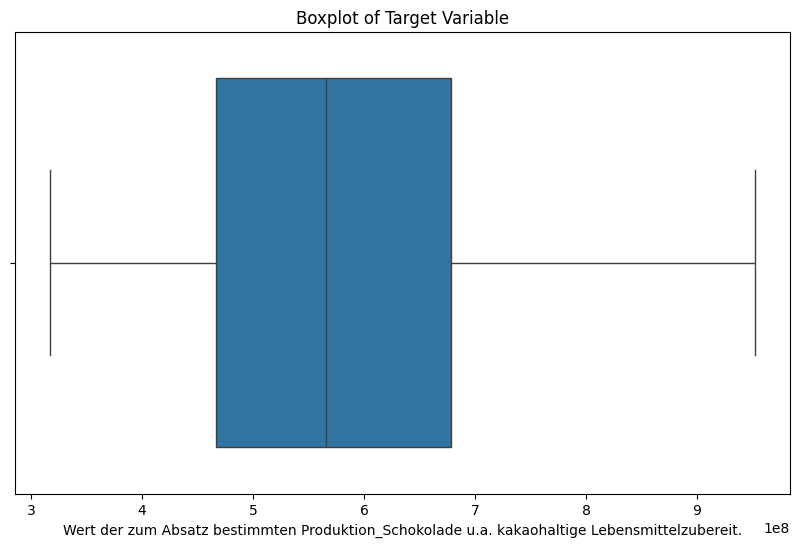

In [100]:

# checking for outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[target])
plt.title('Boxplot of Target Variable')
plt.show()

In [101]:
# checking for outliers using z-score
from scipy import stats
z_scores = stats.zscore(y)
outliers = np.where(np.abs(z_scores) > 3)[0]
print(f"Number of outliers detected using z-score: {len(outliers)}")

Number of outliers detected using z-score: 0


### Defining Baseline Model

In [140]:
features_baseline_colNo = [39, 41, 43, 45, 78, 88, 93, 166, 167, 168, 169, 170]

X_baseline = df.iloc[:, features_baseline_colNo]
y_baseline = df[target]
X_baseline

,Beschäftigte_WZ08-1082,Geleistete Arbeitsstunden_WZ08-1082,Bruttolohn- und -gehaltssumme_WZ08-1082,Umsatz_WZ08-1082,"ErzPr_ Schokolade u.a. kakaoh. Leb.m.zuber.,in Verp.<=2kg",EinfPr_ Süßwaren (ohne Dauerbackwaren),VPI_ Schokoladen,PCOCOUSDM,PCOFFROBUSDM,Ferrero,Mondelez,LindtSpruengli
Datum,,,,,,,,,,,,
2019-01-31,36176.0,4704000.0,111357000.0,6.619170e+08,97.6,102.4,99.2,2263.335036,78.200870,NaN,39.095000,NaN
2019-02-28,35363.0,4374000.0,106786000.0,7.964770e+08,97.6,102.3,99.9,2255.804973,78.653500,NaN,41.495000,NaN
2019-03-31,34926.0,4294000.0,106900000.0,8.120600e+08,97.4,102.5,101.1,2200.484674,76.957619,NaN,42.429048,NaN
2019-04-30,35197.0,3980000.0,102877000.0,6.919610e+08,97.5,102.3,99.8,2331.131022,73.257727,NaN,44.421250,NaN
2019-05-31,35635.0,4321000.0,120322000.0,6.131040e+08,97.5,102.4,101.0,2315.072400,71.118261,NaN,46.047045,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-31,40799.0,4729000.0,149300000.0,1.183673e+09,159.3,235.0,170.2,7604.123627,198.860952,8.200000,53.416190,12.290476
2025-09-30,40849.0,5045000.0,150353000.0,1.493582e+09,163.0,226.6,172.9,7006.525856,210.841364,7.976364,53.113636,13.118182
2025-10-31,40959.0,5132000.0,156021000.0,1.573384e+09,162.3,216.4,174.1,5953.567814,215.060000,7.195652,52.461739,13.521739


#### train test split
nicht sinnvoll, lieber monatliche Neuschätzung und Neu-Evaluierung

In [147]:
# seperating train and test data by time
train_size = int(len(df) * 0.9)  # using first 90% of data for training and last 10% for testing
X_train = X_baseline.iloc[:train_size]
X_test = X_baseline.iloc[train_size:]
y_train = y_baseline.iloc[:train_size]
y_test = y_baseline.iloc[train_size:]

#### Defining Baseline Model

In [137]:
# choosing linear regression as first model
from sklearn.linear_model import LinearRegression  
model_baseline = LinearRegression()

#### Filling Nans

In [148]:
# imputation of num_cols:

# defining numerical columns:
num_cols = list(X_train.select_dtypes(exclude='object').columns)

X_train

,Beschäftigte_WZ08-1082,Geleistete Arbeitsstunden_WZ08-1082,Bruttolohn- und -gehaltssumme_WZ08-1082,Umsatz_WZ08-1082,"ErzPr_ Schokolade u.a. kakaoh. Leb.m.zuber.,in Verp.<=2kg",EinfPr_ Süßwaren (ohne Dauerbackwaren),VPI_ Schokoladen,PCOCOUSDM,PCOFFROBUSDM,Ferrero,Mondelez,LindtSpruengli
Datum,,,,,,,,,,,,
2019-01-31,36176.0,4704000.0,111357000.0,6.619170e+08,97.6,102.4,99.2,2263.335036,78.200870,6.445694,39.095000,NaN
2019-02-28,35363.0,4374000.0,106786000.0,7.964770e+08,97.6,102.3,99.9,2255.804973,78.653500,6.445694,41.495000,NaN
2019-03-31,34926.0,4294000.0,106900000.0,8.120600e+08,97.4,102.5,101.1,2200.484674,76.957619,6.445694,42.429048,NaN
2019-04-30,35197.0,3980000.0,102877000.0,6.919610e+08,97.5,102.3,99.8,2331.131022,73.257727,6.445694,44.421250,NaN
2019-05-31,35635.0,4321000.0,120322000.0,6.131040e+08,97.5,102.4,101.0,2315.072400,71.118261,6.445694,46.047045,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-30,39666.0,4916000.0,221234000.0,1.307285e+09,135.2,216.4,143.6,7919.328270,226.130000,7.706667,61.880476,10.421200
2024-12-31,38759.0,3918000.0,159670000.0,9.805100e+08,135.5,222.4,143.6,10412.185712,237.621818,7.911111,58.940000,10.764556
2025-01-31,39643.0,5040000.0,152145000.0,1.172512e+09,139.1,238.5,143.0,10710.345483,244.939130,8.355455,55.738182,11.032909


In [153]:
# last entry od LindtSpruengli
X_train.iloc[-1]['LindtSpruengli']

np.float64(12.243428571428572)

In [156]:
# imputation of num_cols in training data:
for col in num_cols:
    if X_train[col].isna().sum() > 0:
        X_train.loc[X_train[col].isna(), col] = X_train[col].median()
X_train[col].isna().sum()

np.int64(0)

In [157]:
# imputation of num_cols in test set:
for col in num_cols:
    if X_test[col].isna().sum() > 0:
        X_test.loc[X_test[col].isna(), col] = X_test[col].median()
X_test[col].isna().sum()

np.int64(0)

In [158]:
# imputation of target variable in training set:
if y_train.isna().sum() > 0:
    y_train.loc[y_train.isna()] = y_train.median()

In [159]:
# imputation of target variable in test set:
if y_test.isna().sum() > 0:
    y_test.loc[y_test.isna()] = y_train.median()

In [160]:
# fitting the model
model_baseline.fit(X_train, y_train)
print(model_baseline.coef_)  # beta (slope)
print(model_baseline.intercept_) 

[ 9.37464477e+03  8.82909318e+01 -2.12103027e-01  4.86863437e-01
  4.91587620e+04  2.20492275e+05  5.70769729e+05 -4.07547142e+03
 -2.29045123e+05  1.73236720e+07 -1.63244549e+06 -2.66840995e+07]
-401129649.212396


#### Validation of Baseline Model

In [161]:
# predicting target variable in test set
target_pred = model_baseline.predict(X_test)

In [ ]:
### doesn't work yet 


import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

sns.regplot(x=X_baseline.iloc[:, 0],  # metro distances in training data set
            y=target,  # prices in training data set
            scatter_kws={'color':'#17415f',  # dark blue dots
                         'alpha':1},  # no transparency for dots
            line_kws={'color':'#70b8e5'},  # light blue regression line
            ci=None,  # no confidence intervals around line
            ax=ax)  # plot on current Axes

sns.regplot(x=X_baseline.iloc[:, 0],  # x-values of houses with estimated prices
            y=target_pred,  # estimated prices
            scatter_kws={'color':'#ff9e1c',  # orange dots
                         'alpha':1,  # no transparency for dots
                         's':70},  # dot size
            fit_reg=False,  # no additional regression line
            ci=None,  # no confidence intervals around line
            ax=ax)  # plot on current Axes

ax.set(xlim=[0, max(df.iloc[:, 122])])

In [162]:
# using mean squared error to evaluate the model
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, target_pred)**0.5/np.mean(y_test)  # root mean squared error divided by mean of target variable to get a relative error


np.float64(0.043598727187558174)

In [163]:
# data frame with actual and predicted values for line plot
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': target_pred})
results_df.sort_index(inplace=True)  # sort by index to ensure correct order for line plot
results_df

,Actual,Predicted
Datum,,
2025-04-30,593562000.0,6.496124e+08
2025-05-31,586924000.0,5.594146e+08
2025-06-30,594658000.0,5.611599e+08
2025-07-31,711141000.0,7.110695e+08
2025-08-31,740334000.0,7.506424e+08
2025-09-30,951864000.0,9.037665e+08
2025-10-31,941120000.0,9.286268e+08
2025-11-30,874262000.0,8.379772e+08
2025-12-31,525599000.0,5.336060e+08


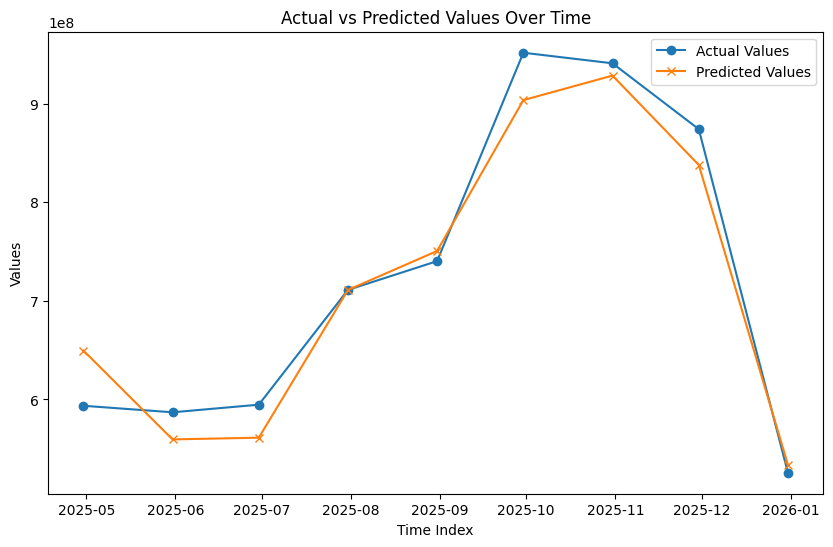

In [164]:
# time series plot based on rsults_df
plt.figure(figsize=(10, 6))
plt.plot(results_df.index, results_df['Actual'], label='Actual Values', marker='o')
plt.plot(results_df.index, results_df['Predicted'], label='Predicted Values', marker='x')
plt.xlabel('Time Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values Over Time')
plt.legend()
plt.show()

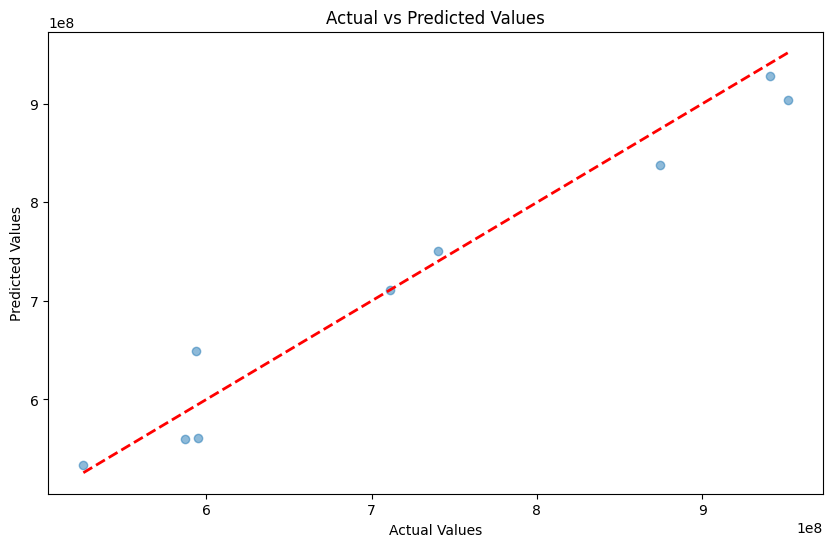

In [165]:
# line plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, target_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [166]:
# using r2 score to evaluate the model
from sklearn.metrics import r2_score
r2_score(y_test, target_pred)


0.9580455096339758